***STEP-1-->***
### **Download the Cat-vs-Dog dataset::**

In [1]:
!wget --no-check-certificate \
     "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
     -O "/tmp/cats-and-dogs.zip"

--2020-06-06 03:18:10--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.26.80.188, 2600:1409:3800:18d::e59, 2600:1409:3800:1ab::e59
Connecting to download.microsoft.com (download.microsoft.com)|184.26.80.188|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   128MB/s    in 6.4s    

2020-06-06 03:18:17 (123 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



***STEP-2-->***
### **Un-zip the Dataset::**

In [0]:
#ZipFile library to unzip data:: 
import zipfile  #Class.

#Provide reference of local direcotry::
local_zip = '/tmp/cats-and-dogs.zip'
#Create an object of class 'zipfile' to use class/Object methods to un-zip the dataset::
zip_ref = zipfile.ZipFile(local_zip,'r')
#Un-zip the dataset in 'tmp' directory::
zip_ref.extractall('/tmp')
#Close the reference::
zip_ref.close()

**Check the number of images in each dataset::**

In [3]:
#OS library to use OS commands::
import os
print("[INFO]-->TOTAL CAT IMAGES::",end='')
print(len(os.listdir('/tmp/PetImages/Cat')))
print("[INFO]-->TOTAL DOG IMAGES::",end='')
print(len(os.listdir('/tmp/PetImages/Dog')))

[INFO]-->TOTAL CAT IMAGES::12501
[INFO]-->TOTAL DOG IMAGES::12501


***STEP-3-->***

### **Create Training and Validation folders in Tmp directory::**

In [0]:
#Import OS module::
import os
try:
  os.mkdir('/tmp/cats-vs-dogs')
  os.mkdir('/tmp/cats-vs-dogs/training/')
  os.mkdir('/tmp/cats-vs-dogs/testing/')
  os.mkdir('/tmp/cats-vs-dogs/training/cats')
  os.mkdir('/tmp/cats-vs-dogs/training/dogs')
  os.mkdir('/tmp/cats-vs-dogs/testing/cats')
  os.mkdir('/tmp/cats-vs-dogs/testing/dogs')
except OSError:
  pass

***STEP-4-->***

### ***Separate dataset into Training and Testing::***

In [0]:
#Import dependencies::
import random
from shutil import copyfile

In [6]:
def split_data(DATA_SOURCE, DATA_TRAINING, DATA_TESTING, SPLIT_SIZE):
  files = []
  #STEP-1--> Check each file status(present or currupt)::
  for filename in os.listdir(DATA_SOURCE):
    IMAGE_FILE = DATA_SOURCE + filename
    if os.path.getsize(IMAGE_FILE) > 0:
      files.append(filename)
    else:
      print(filename+' is zero length,so ignoring..!')
    
  #STEP-2--> Define Split size::
  training_data_size = int(len(files) * SPLIT_SIZE)
  testing_data_size = int(len(files) - training_data_size)
  shuffled_set = random.sample(files,len(files))  ##IMPORTANT
  training_dataset = shuffled_set[0:training_data_size]
  testing_dataset = shuffled_set[training_data_size:]

  #STEP-3-->Shifting the files in appropriate folder::
  #Transfer Training Images into Training Folder-->
  for filename in training_dataset:
    src_file = DATA_SOURCE + filename
    destination_file = DATA_TRAINING + filename
    #'src' and 'dst' are path names given as strings.
    copyfile(src_file,destination_file)  ##Copy the contents of the file named "src" to a file named "dst".
   
  #Transfer Testing Images into Testing Folder-->
  for filename in testing_dataset:
    src_file = DATA_SOURCE + filename
    destination_file = DATA_TESTING + filename
    #'src' and 'dst' are path names given as strings.
    copyfile(src_file,destination_file)  ####Copy the contents of the file named "src" to a file named "dst".

#STEP-4--> 
#Define Data Sources-->
CAT_SOURCE_DIR = '/tmp/PetImages/Cat/'  ##Source data for picking Cat Images.
TRAINING_CATS_DIR = '/tmp/cats-vs-dogs/training/cats/'
TESTING_CATS_DIR = '/tmp/cats-vs-dogs/testing/cats/'
DOG_SOURCE_DIR = '/tmp/PetImages/Dog/'  ##Source data for picking Dog Images.
TRAINING_DOGS_DIR = '/tmp/cats-vs-dogs/training/dogs/'
TESTING_DOGS_DIR = '/tmp/cats-vs-dogs/testing/dogs'

#STEP-5-->
#Define split size & call the function::
split_size = 0.9
#Call function for Cats dataset::
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
#Call function for Dogs dataset::
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length,so ignoring..!
11702.jpg is zero length,so ignoring..!


In [0]:
test_list = [0,1,2,3,4,5,6,7,8,9,10]
train_len = int(len(test_list) * 0.9)
test_len = int(len(test_list) - train_len)
print("Data records in Train dataset: ",train_len)
print("Data records in Test dataset: ",test_len)
train_dataset = test_list[0:train_len]
print("Train Dataset:",train_dataset)
test_dataset = test_list[train_len:]
print("Test Dataset:",test_dataset)

Data records in Train dataset:  9
Data records in Test dataset:  2
Train Dataset: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Test Dataset: [9, 10]


**Print the length of each directory::**

In [9]:
print("[INFO]--> CAT TRAINING DATA:: ",len(os.listdir('/tmp/cats-vs-dogs/training/cats/')))
print("[INFO]--> DOG TRAINING DATA:: ",len(os.listdir('/tmp/cats-vs-dogs/training/dogs/')))
print("[INFO]--> CAT TESTING DATA:: ",len(os.listdir('/tmp/cats-vs-dogs/testing/cats/')))
print("[INFO]--> DOG TESTING DATA:: ",len(os.listdir('/tmp/cats-vs-dogs/testing/dogs')))

[INFO]--> CAT TRAINING DATA::  11250
[INFO]--> DOG TRAINING DATA::  11250
[INFO]--> CAT TESTING DATA::  1250
[INFO]--> DOG TESTING DATA::  0


**Separate all Cats and Dogs file names in Training and Testing Datasets to seperate folders::**

In [10]:
train_cat_filenames = os.listdir('/tmp/cats-vs-dogs/training/cats/')
print(train_cat_filenames[:10])
print("[INFO]-->TOTAL TRAIN CAT FILES::",len(train_cat_filenames))
print()

train_dog_filenames = os.listdir('/tmp/cats-vs-dogs/training/dogs/')
print(train_dog_filenames[:10])
print("[INFO]-->TOTAL TRAIN DOG FILES::",len(train_dog_filenames))
print()

test_cat_filenames = os.listdir('/tmp/cats-vs-dogs/testing/cats/')
print(test_cat_filenames[:10])
print("[INFO]-->TOTAL TEST CAT FILES::",len(test_cat_filenames))
print()

test_dog_filenames = os.listdir('/tmp/cats-vs-dogs/testing/dogs/')
print(test_cat_filenames[:10])
print("[INFO]-->TOTAL TEST DOG FILES::",len(test_cat_filenames))
print()

['8279.jpg', '4306.jpg', '3041.jpg', '7536.jpg', '5881.jpg', '3290.jpg', '443.jpg', '4933.jpg', '4345.jpg', '2700.jpg']
[INFO]-->TOTAL TRAIN CAT FILES:: 11250

['8279.jpg', '4306.jpg', '3041.jpg', '7536.jpg', '5881.jpg', '3290.jpg', '443.jpg', '4933.jpg', '4345.jpg', '6428.jpg']
[INFO]-->TOTAL TRAIN DOG FILES:: 11250

['1768.jpg', '9643.jpg', '7542.jpg', '9906.jpg', '10338.jpg', '5968.jpg', '1617.jpg', '10667.jpg', '1626.jpg', '1406.jpg']
[INFO]-->TOTAL TEST CAT FILES:: 1250

['1768.jpg', '9643.jpg', '7542.jpg', '9906.jpg', '10338.jpg', '5968.jpg', '1617.jpg', '10667.jpg', '1626.jpg', '1406.jpg']
[INFO]-->TOTAL TEST DOG FILES:: 1250



***STEP-5-->***
### **Plotting some image samples-->**
Let's take a look at some of the images to get better sence of what they look like. 

In [0]:
#Configure the Matplot lib::
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#Define number of rows and columns for the graph:
nrows = 5
ncolumns = 5

#Set an index to iterate over the image files::
picture_index = 0

(391, 500, 3)


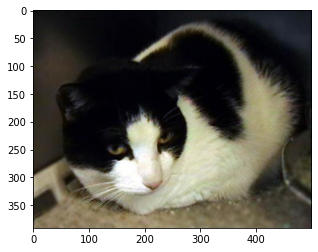

In [14]:
#Get the size of any random Cat and Dog images::
img_path = '/tmp/cats-vs-dogs/testing/cats/10069.jpg'
image = mpimg.imread(img_path)
print(image.shape)
plt.imshow(image)

In [15]:
#Set-up Matplotlib figure and size of that figure to fit 5 x 5 pictures::
#Create a new figure-->
fig = plt.gcf()  ##gcf-->Get Current Figure(if no current figure exists then the new one is created)
#Set the figure size-->
fig.set_size_inches((nrows * 5,ncolumns*5)) 

#Update picture_index counter::
picture_index += 12
next_cat_img = []
next_dog_img = []

#Iterate over the filenames::
for fname in train_cat_filenames[picture_index - 12 : picture_index+1]: ##[0 : 13]-->[0,1,2,...,12]
  next_cat_img.append(os.path.join('/tmp/cats-vs-dogs/training/cats',fname))
for fname in train_dog_filenames[picture_index - 12 : picture_index]:   ##[0 : 12]-->[0,1,2,...,11]
  next_dog_img.append(os.path.join('/tmp/cats-vs-dogs/training/dogs',fname))

#Display the images::
for i,img_path in enumerate(next_cat_img + next_dog_img): ##[13+12=25]-->[0,1,2,3,...24]
  #Set up subplot; subplot indices start at 1:
  subplot = plt.subplot(nrows,ncolumns,i+1)
  # Don't show axes (or gridlines)
  subplot.axis('Off')
  #Read the image::
  img = mpimg.imread(img_path)
  #Show the image:
  plt.imshow(img)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

***STEP-6-->***
### **Construct the Model::**

In [16]:
#Import Dependencies::
#Import TensorFLow module::
import tensorflow as tf
print(tf.__version__)
#Import Optimizer module::
from tensorflow.keras.optimizers import RMSprop
#Import ImageDataGenerator module::
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2.2.0


In [0]:
#Construct the Model-->
#Model Type:: Sequential Model(Stack of Layers)
#Model Structure::
  # 3 : Convolution Layers
  # 3 : Maxpooling Layers
  # 1 : Flatten Layer
  # 2 : Dense Layers
  # 1 : Output Layer
cat_dog_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                                            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                            tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                            tf.keras.layers.Conv2D(48,(3,3),activation='relu'),
                                            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                            tf.keras.layers.Flatten(),
                                            tf.keras.layers.Dense(128,activation='relu'),
                                            tf.keras.layers.Dense(256,activation='relu'),
                                            tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)])

In [19]:
#Print Model summary::
cat_dog_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 48)        13872     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 48)        0         
_________________________________________________________________
flatten (Flatten)            (None, 58800)             0

***STEP-7-->***

### **Compile the Model for training::**

In [0]:
cat_dog_model.compile(optimizer=RMSprop(learning_rate=0.001),
                      loss = tf.keras.losses.binary_crossentropy,
                      metrics = ['accuracy'])

***STEP-8-->***

### **Create Data Generators for Training and Testing::**

In [24]:
TRAIN_DIRECTORY = '/tmp/cats-vs-dogs/training'
TEST_DIRECTORY = '/tmp/cats-vs-dogs/testing'

#Create DataGenerator for Training Dataset-->
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
train_generator = train_datagen.flow_from_directory(TRAIN_DIRECTORY,
                                                    target_size=(300,300),
                                                    class_mode='binary',
                                                    batch_size=250)

#Create DataGenerator for Validation Dataset-->
test_datagen = ImageDataGenerator(rescale = 1.0 / 255.0)
test_generator = test_datagen.flow_from_directory(TEST_DIRECTORY,
                                                  target_size=(300,300),
                                                  class_mode = 'binary',
                                                  batch_size = 150) 

Found 22498 images belonging to 2 classes.
Found 1250 images belonging to 2 classes.


***STEP-8-->***

### **Fit the Data Generators and Start the Training::**

In [25]:
cat_dog_model_history = cat_dog_model.fit(train_generator,
                                          epochs = 15,
                                          validation_data = test_generator,
                                          steps_per_epoch = 90,
                                          validation_steps = 8)

Epoch 1/15
78/90 [=========================>....] - ETA: 12s - loss: 0.7223 - accuracy: 0.5883

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

90/90 [==============================] - 98s 1s/step - loss: 0.7066 - accuracy: 0.5991 - val_loss: 0.6224 - val_accuracy: 0.6783
Epoch 2/15
90/90 [==============================] - 93s 1s/step - loss: 0.5748 - accuracy: 0.6978 - val_loss: 0.6156 - val_accuracy: 0.6642
Epoch 3/15
90/90 [==============================] - 93s 1s/step - loss: 0.5122 - accuracy: 0.7487 - val_loss: 0.3488 - val_accuracy: 0.8492
Epoch 4/15
90/90 [==============================] - 94s 1s/step - loss: 0.4620 - accuracy: 0.7767 - val_loss: 0.2979 - val_accuracy: 0.8850
Epoch 5/15
90/90 [==============================] - 92s 1s/step - loss: 0.3954 - accuracy: 0.8223 - val_loss: 0.3117 - val_accuracy: 0.8708
Epoch 6/15
90/90 [==============================] - 92s 1s/step - loss: 0.3354 - accuracy: 0.8528 - val_loss: 0.2385 - val_accuracy: 0.9142
Epoch 7/15
90/90 [==============================] - 92s 1s/step - loss: 0.2599 - accuracy: 0.8882 - val_loss: 0.3345 - val_accuracy: 0.8658
Epoch 8/15
90/90 [=============

Let's see what's inside Model History-->

In [28]:
cat_dog_model_history.history

{'accuracy': [0.5991199016571045,
  0.6977509260177612,
  0.7487332224845886,
  0.7767357230186462,
  0.8223397731781006,
  0.8527868986129761,
  0.888212263584137,
  0.9266157150268555,
  0.953284740447998,
  0.9677304625511169,
  0.9714641571044922,
  0.9735087752342224,
  0.9764868021011353,
  0.9687528014183044,
  0.984576404094696],
 'loss': [0.7066313624382019,
  0.5747779011726379,
  0.5122323632240295,
  0.462003231048584,
  0.39536747336387634,
  0.3354404866695404,
  0.25985342264175415,
  0.191233292222023,
  0.12707804143428802,
  0.10922608524560928,
  0.10238796472549438,
  0.10103552043437958,
  0.083401158452034,
  0.21452516317367554,
  0.04820634052157402],
 'val_accuracy': [0.6783333420753479,
  0.6641666889190674,
  0.8491666913032532,
  0.8849999904632568,
  0.8708333373069763,
  0.9141666889190674,
  0.8658333420753479,
  0.8166666626930237,
  0.6733333468437195,
  0.8274999856948853,
  0.7975000143051147,
  0.8041666746139526,
  0.7925000190734863,
  0.7616666555

In [29]:
cat_dog_model_history.model

In [30]:
cat_dog_model_history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [32]:
type(cat_dog_model_history)

tensorflow.python.keras.callbacks.History

***STEP-9-->***
### **Plotting Accuracy and Loss metrics:**

In [0]:
#Import plotting modules::
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#Seperate Training & Validation accuracy and loss in their respective folders::
train_accuracy = cat_dog_model_history.history['accuracy']
train_loss = cat_dog_model_history.history['loss']
validation_accuracy = cat_dog_model_history.history['val_accuracy']
validation_loss = cat_dog_model_history.history['val_loss']
num_epochs = range(len(cat_dog_model_history.epoch))

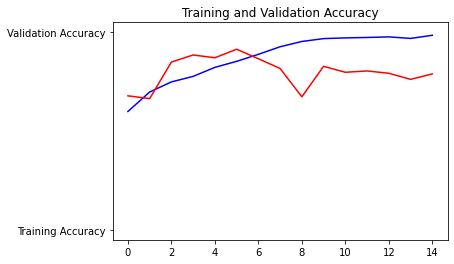

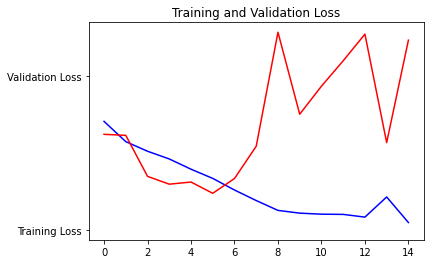

In [40]:
#*************************************************
#Plot Training and Validation Accuracy Per Epoch::
#*************************************************
#SIGNATURE--> plt.plot(x,y) , plot(x1, y1, 'bo')  , plot(x2, y2, 'go')
plt.plot(num_epochs,train_accuracy,'b',"Training Accuracy")
plt.plot(num_epochs,validation_accuracy,'r',"Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.show()

#*********************************************
#Plot Training and Validation Loss per Epoch::
#*********************************************
#SIGNATURE--> plt.plot(x,y) , plot(x1, y1, 'bo')  , plot(x2, y2, 'go')  
plt.plot(num_epochs,train_loss,'b',"Training Loss")
plt.plot(num_epochs,validation_loss,'r',"Validation Loss")
plt.title("Training and Validation Loss")
plt.show()

In [37]:
num_epochs

range(0, 15)

***STEP-10-->***

### **Classifying Real-Images::**

In [59]:
#Import dependencies::
import numpy as np
from google.colab import files
from keras.preprocessing import image

#Create an instance of 'files' class:
#RETURN --> A map of the form { filename :  file contents } for all uploaded files.
uploaded_img = files.upload()

#Iterate over the file names::
for file_name in uploaded_img.keys():
  #Create Image Path::
  image_path = '/content/' + file_name

  #Load the image::
  loaded_img = image.load_img(image_path,target_size=(300,300))

  #Convert loaded_image into array format::
  img_array = image.img_to_array(loaded_img)

  #Rescale the image(0 to 1)::
  img_array = img_array / 255.0

  #Expand dimensions of an image array::
  img_array = np.expand_dims(img_array,axis=0)

  images = np.vstack([img_array])

  #Perform predictions::
  classes = cat_dog_model.predict(images,batch_size=10)
  #Print predictions::
  print(classes[0])
  if classes[0] > 0.5:
    print(file_name + '-->is a Dog..!')
  else:
    print(file_name + '-->is a Cat..!')

Saving instance-1-cat.jpg to instance-1-cat.jpg
Saving instance-2-cat.jpg to instance-2-cat.jpg
Saving instance-3-cat.jpg to instance-3-cat.jpg
Saving instance-4-cat.jpg to instance-4-cat.jpg
Saving instance-5-cat.jpg to instance-5-cat.jpg
[0.8822827]
instance-1-cat.jpg-->is a Dog..!
[0.01566839]
instance-2-cat.jpg-->is a Cat..!
[0.63470703]
instance-3-cat.jpg-->is a Dog..!
[2.7979605e-11]
instance-4-cat.jpg-->is a Cat..!
[0.63470703]
instance-5-cat.jpg-->is a Dog..!


**TEST-1(PRIMARY ANALYSIS)-->**

In [45]:
##TEST 1(PRIMARY)->COMBINATION OF CAT AND DOG IMAGES::
print("[INFO]-->TOTAL UPLOADED CAT IMAGE--",str(4))
print("[INFO]-->TOTAL CORRECT PREDICTED CAT IMAGE--",str(2))
print("[INFO]-->TOTAL UPLOADED DOG IMAGE--",str(4))
print("[INFO]-->TOTAL CORRECT PREDICTED CAT IMAGE--",str(3))

[INFO]-->TOTAL UPLOADED CAT IMAGE-- 4
[INFO]-->TOTAL CORRECT PREDICTED CAT IMAGE-- 2
[INFO]-->TOTAL UPLOADED DOG IMAGE-- 4
[INFO]-->TOTAL CORRECT PREDICTED CAT IMAGE-- 3


***CONCLUSION(PRIMARY)-->***

**Prediction accuracy on Identifying Cat Images is :: 50%**

(i.e. Our Model will be provide correct prediction only on 50% of given Data.)

**Prediction accuracy on Identifying Cat Images is :: 75%**

(i.e. Our Model will be provide correct prediction only on 75% of given Data.)

**TEST 2(RECONFIRM PRIMARY ANALYSIS)-->**

In [57]:
##TEST 2.1-->ONLY CAT IMAGES::
print("[INFO]-->TOTAL UPLOADED CAT IMAGE--",str(8))
print("[INFO]-->TOTAL CORRECT PREDICTED CAT IMAGE--",str(4))
print("[INFO]-->TOTAL UPLOADED DOG IMAGE--",str(0))
print("[INFO]-->TOTAL CORRECT PREDICTED DOG IMAGE--",str(4))

[INFO]-->TOTAL UPLOADED CAT IMAGE-- 8
[INFO]-->TOTAL CORRECT PREDICTED CAT IMAGE-- 4
[INFO]-->TOTAL UPLOADED DOG IMAGE-- 0
[INFO]-->TOTAL CORRECT PREDICTED DOG IMAGE-- 4


In [56]:
##TEST 2.2-->ONLY DOG IMAGES::
print("[INFO]-->TOTAL UPLOADED CAT IMAGE--",str(0))
print("[INFO]-->TOTAL CORRECT PREDICTED CAT IMAGE--",str(1))
print("[INFO]-->TOTAL UPLOADED DOG IMAGE--",str(8))
print("[INFO]-->TOTAL CORRECT PREDICTED DOG IMAGE--",str(7))

[INFO]-->TOTAL UPLOADED CAT IMAGE-- 0
[INFO]-->TOTAL CORRECT PREDICTED CAT IMAGE-- 1
[INFO]-->TOTAL UPLOADED DOG IMAGE-- 8
[INFO]-->TOTAL CORRECT PREDICTED DOG IMAGE-- 7


***CONCLUSION(SECONDARY)-->***

Prediction accuracy on Identifying Cat Images is :: 50%

(i.e. Our Model will be provide correct prediction only on 50% of given Data.)--**`SAME AS PRIMARY CONCLUSION`**

**`Model_Prediction_for_Cats = Total Uploaded Images / 2`**

---
Prediction accuracy on Identifying Dog Images is :: 85%

**`Model_Prediction_for_Dogs = Total Uploaded Images  - 1`**

(i.e. Our Model will be provide correct prediction only on 85% of given Data.)--DIFFER FROM PRIMARY CONCLUSION(AS TEST DATA INCREASES)